# **Loan Approval Classification**

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari Kaggle : https://www.kaggle.com/datasets/taweilo/loan-approval-classification-data/data


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
!pip install category-encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 3.9 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from sklearn.utils import resample
import category_encoders as ce
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, accuracy_score, classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [3]:
df = pd.read_csv('/content/loan_data.csv')

In [4]:
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (45000, 14)


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_l

,count,mean,std,min,25%,50%,75%,max
person_age,45000.0,27.764178,6.045108,20.00,24.00,26.00,30.00,144.00
person_income,45000.0,80319.053222,80422.498632,8000.00,47204.00,67048.00,95789.25,7200766.00
person_emp_exp,45000.0,5.410333,6.063532,0.00,1.00,4.00,8.00,125.00
loan_amnt,45000.0,9583.157556,6314.886691,500.00,5000.00,8000.00,12237.25,35000.00
loan_int_rate,45000.0,11.006606,2.978808,5.42,8.59,11.01,12.99,20.00
loan_percent_income,45000.0,0.139725,0.087212,0.00,0.07,0.12,0.19,0.66
cb_person_cred_hist_length,45000.0,5.867489,3.879702,2.00,3.00,4.00,8.00,30.00
credit_score,45000.0,632.608756,50.435865,390.00,601.00,640.00,670.00,850.00
loan_status,45000.0,0.222222,0.415744,0.00,0.00,0.00,0.00,1.00


In [5]:
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

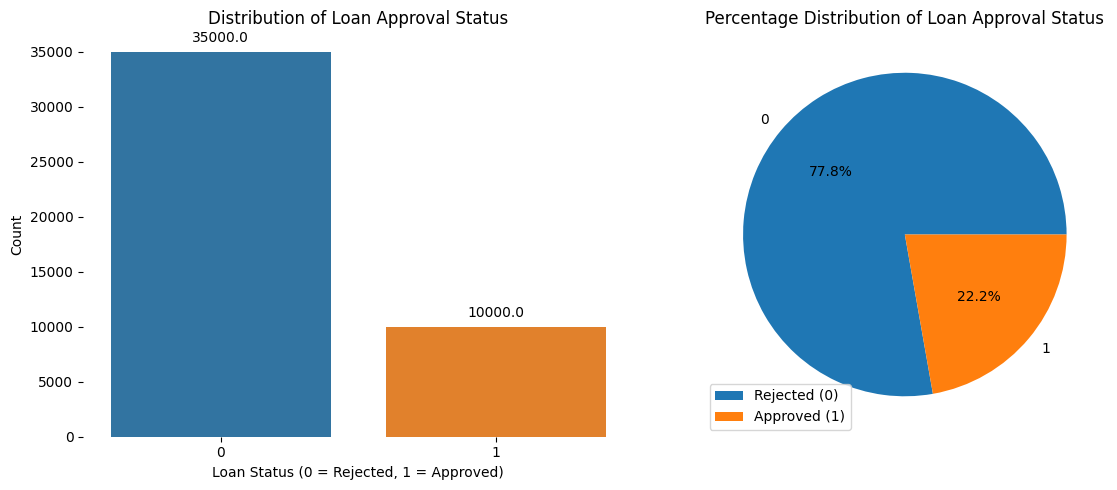

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

loan_status_counts = df['loan_status'].value_counts()

sns.barplot(x=loan_status_counts.index, y=loan_status_counts, ax=axes[0], palette='tab10')
axes[0].set_title('Distribution of Loan Approval Status')
axes[0].set_ylabel('Count')
axes[0].set_xlabel('Loan Status (0 = Rejected, 1 = Approved)')

for p in axes[0].patches:
    axes[0].annotate(f'{p.get_height()}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center',
                     xytext=(0, 10), textcoords='offset points')

sns.despine(left=True, bottom=True)

loan_status_percentage = loan_status_counts / loan_status_counts.sum() * 100
axes[1].pie(loan_status_percentage, labels=loan_status_percentage.index, autopct='%1.1f%%',
            colors=sns.color_palette('tab10'))
axes[1].set_title('Percentage Distribution of Loan Approval Status')
plt.legend(['Rejected (0)', 'Approved (1)'])

plt.tight_layout()
plt.show()

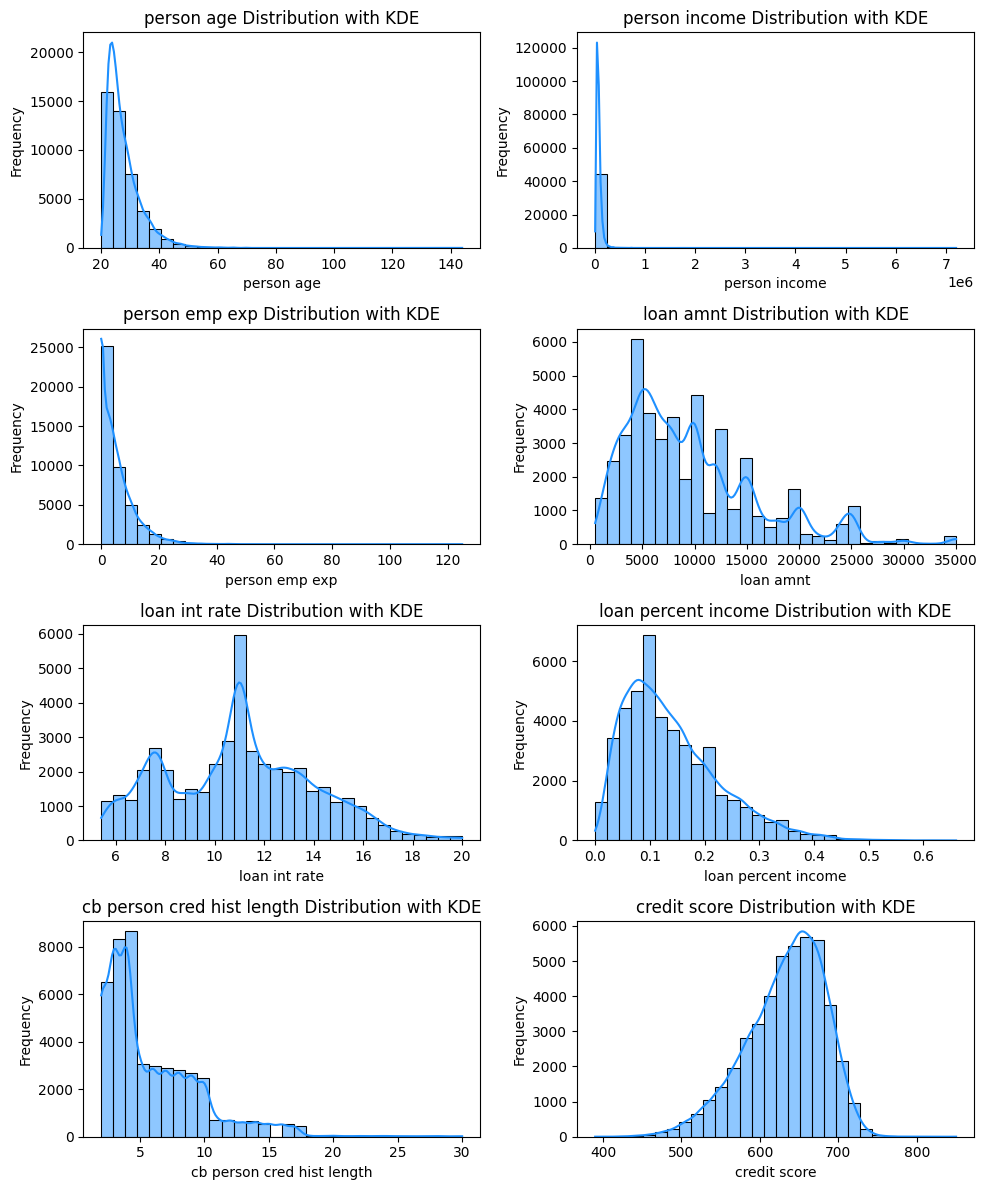

In [7]:
def univariate_analysis(data, columns):
    plt.figure(figsize=(10, 12))

    for i, column in enumerate(columns, 1):
        plt.subplot(4, 2, i)
        sns.histplot(data[column], kde=True, bins=30, color='dodgerblue')
        plt.title(f'{column.replace("_", " ")} Distribution with KDE')
        plt.xlabel(column.replace('_', ' '))
        plt.ylabel('Frequency')

    plt.tight_layout()
    plt.show()

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

univariate_analysis(df, columns_to_analyze)

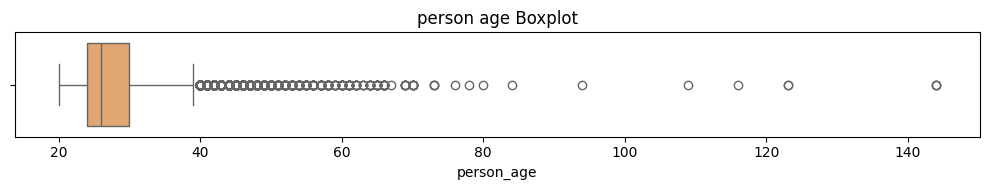


Summary Statistics for person age:
 count    45000.000000
mean        27.764178
std          6.045108
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64


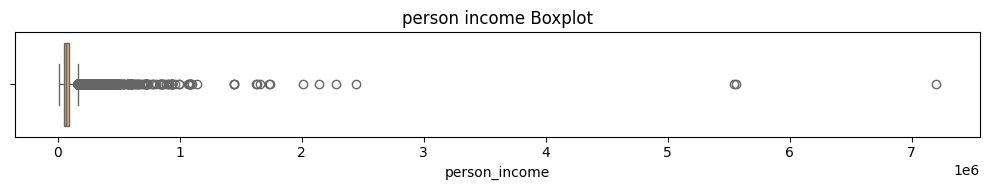


Summary Statistics for person income:
 count    4.500000e+04
mean     8.031905e+04
std      8.042250e+04
min      8.000000e+03
25%      4.720400e+04
50%      6.704800e+04
75%      9.578925e+04
max      7.200766e+06
Name: person_income, dtype: float64


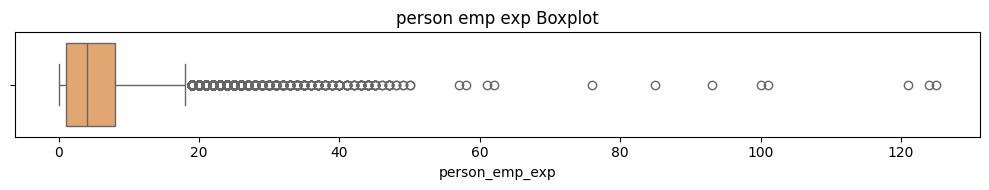


Summary Statistics for person emp exp:
 count    45000.000000
mean         5.410333
std          6.063532
min          0.000000
25%          1.000000
50%          4.000000
75%          8.000000
max        125.000000
Name: person_emp_exp, dtype: float64


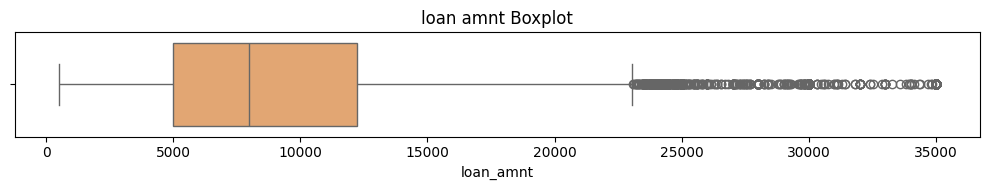


Summary Statistics for loan amnt:
 count    45000.000000
mean      9583.157556
std       6314.886691
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12237.250000
max      35000.000000
Name: loan_amnt, dtype: float64


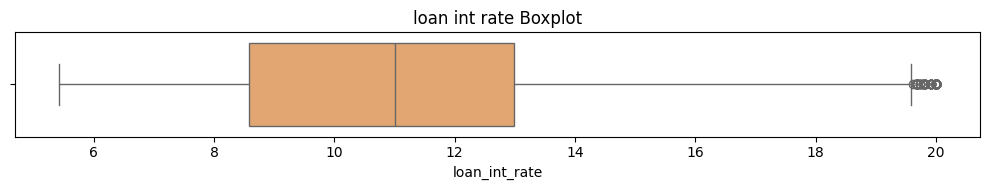


Summary Statistics for loan int rate:
 count    45000.000000
mean        11.006606
std          2.978808
min          5.420000
25%          8.590000
50%         11.010000
75%         12.990000
max         20.000000
Name: loan_int_rate, dtype: float64


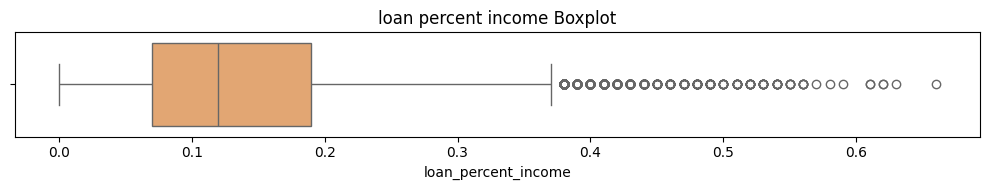


Summary Statistics for loan percent income:
 count    45000.000000
mean         0.139725
std          0.087212
min          0.000000
25%          0.070000
50%          0.120000
75%          0.190000
max          0.660000
Name: loan_percent_income, dtype: float64


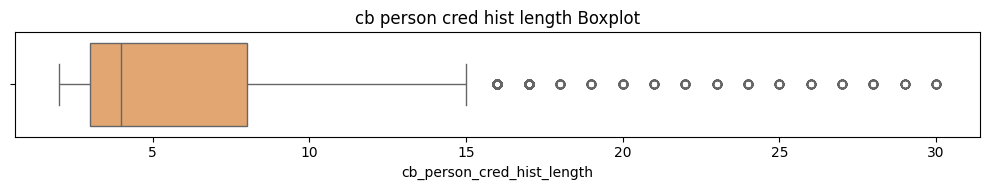


Summary Statistics for cb person cred hist length:
 count    45000.000000
mean         5.867489
std          3.879702
min          2.000000
25%          3.000000
50%          4.000000
75%          8.000000
max         30.000000
Name: cb_person_cred_hist_length, dtype: float64


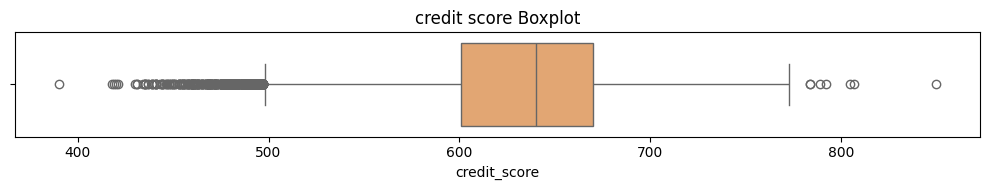


Summary Statistics for credit score:
 count    45000.000000
mean       632.608756
std         50.435865
min        390.000000
25%        601.000000
50%        640.000000
75%        670.000000
max        850.000000
Name: credit_score, dtype: float64


In [8]:
def univariate_analysis(data, column, title):
    plt.figure(figsize=(10, 2))

    sns.boxplot(x=data[column], color='sandybrown')
    plt.title(f'{title} Boxplot')

    plt.tight_layout()
    plt.show()

    print(f'\nSummary Statistics for {title}:\n', data[column].describe())

columns_to_analyze = ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']

for column in columns_to_analyze:
    univariate_analysis(df, column, column.replace('_', ' '))

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
# Binary Encoding for person_gender
df['person_gender'] = df['person_gender'].map({'female': 0, 'male': 1})
# Binary Encoding for previous_loan_defaults_on_file
df['previous_loan_defaults_on_file'] = df['previous_loan_defaults_on_file'].map({'No': 0, 'Yes': 1})

# Ordinal Encoding for person_education (if applicable)
education_order = {'High School': 1, 'Associate': 2, 'Bachelor': 3,
                   'Master': 4, 'Doctorate': 5}
df['person_education'] = df['person_education'].map(education_order)

# One-Hot Encoding for person_home_ownership and loan_intent
df = pd.get_dummies(df, columns=['person_home_ownership', 'loan_intent'], drop_first=True)


# Display the transformed DataFrame
print(df.head())

   person_age  person_gender  person_education  person_income  person_emp_exp  \
0        22.0              0                 4        71948.0               0   
1        21.0              0                 1        12282.0               0   
2        25.0              0                 1        12438.0               3   
3        23.0              0                 3        79753.0               0   
4        24.0              1                 4        66135.0               1   

   loan_amnt  loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
0    35000.0          16.02                 0.49                         3.0   
1     1000.0          11.14                 0.08                         2.0   
2     5500.0          12.87                 0.44                         3.0   
3    35000.0          15.23                 0.44                         2.0   
4    35000.0          14.27                 0.53                         4.0   

   credit_score  previous_loan_d

In [10]:
# Replacing Outliers with Median
median_age = df['person_age'].median()
df['person_age'] = df['person_age'].apply(lambda x: median_age if x > 100 else x)

In [11]:
column = 'person_age'
title = column.replace('_', ' ')

# Display summary statistics for person_age
print(f'\nSummary Statistics for {title}:\n', df[column].describe())


Summary Statistics for person age:
 count    45000.000000
mean        27.748156
std          5.909318
min         20.000000
25%         24.000000
50%         26.000000
75%         30.000000
max         94.000000
Name: person_age, dtype: float64


In [12]:
# Simpan hasil preprocessing ke CSV
output_path = "/content/preprocessed_loan_data.csv"
print(f"Menyimpan hasil preprocessing ke {output_path}...")
df.to_csv(output_path, index=False)
print(f"Data berhasil disimpan ke {output_path}")

Menyimpan hasil preprocessing ke /content/preprocessed_loan_data.csv...
Data berhasil disimpan ke /content/preprocessed_loan_data.csv
